# 📊 Veri Madenciliği ve Büyük Veri Analizi
**Proje Adı:** Öğrenci Başarı Analizi  
**Amaç:** Öğrenci başarılarını etkileyen faktörleri makine öğrenmesi ile analiz etmek

In [18]:
from google.colab import files
uploaded = files.upload()  # Excel dosyanı yükle: Ogrenci_Performans.xlsx

Saving Ogrenci_Performans.xlsx to Ogrenci_Performans (1).xlsx


In [19]:
import pandas as pd
df = pd.read_excel("Ogrenci_Performans.xlsx")
df.head()

,Cinsiyet,Ebeveyn Egitim Seviyesi,Okul Yemekhanesi,Ozel Ders,Matematik,Okuma,Yazma
0,Kadin,Lisans Mezunu,Yok,Yok,72,72,74
1,Kadin,Onlisans Mezunu,Yok,Var,69,90,88
2,Kadin,Yuksek Lisans Mezunu,Yok,Yok,90,95,93
3,Erkek,Onlisans Mezunu,Var,Yok,47,57,44
4,Erkek,Onlisans Mezunu,Yok,Yok,76,78,75


In [20]:
# Başta ve sonda bulunan boşlukları sildik
df.columns = df.columns.str.strip()

# Ortalama başarı sütunu
df["Ortalama"] = df[["Matematik", "Okuma", "Yazma"]].mean(axis=1)

#Eksik verileri tespit ettik ve kategorik verileri sayısallaştırdık
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Cinsiyet"] = le.fit_transform(df["Cinsiyet"])
df["Yemekhane"] = le.fit_transform(df["Okul Yemekhanesi"])
df["Ozel_Ders"] = le.fit_transform(df["Ozel Ders"])

egitim_map = {
    "Ilkokul Mezunu": 0,
    "Ortaokul Mezunu": 1,
    "Lise Mezunu": 2,
    "Onlisans Mezunu": 3,
    "Lisans Mezunu": 4,
    "Yuksek Lisans Mezunu": 5
}
df["Ebeveyn_Egitim"] = df["Ebeveyn Egitim Seviyesi"].map(egitim_map)

df.head()


,Cinsiyet,Ebeveyn Egitim Seviyesi,Okul Yemekhanesi,Ozel Ders,Matematik,Okuma,Yazma,Ortalama,Yemekhane,Ozel_Ders,Ebeveyn_Egitim
0,1,Lisans Mezunu,Yok,Yok,72,72,74,72.666667,1,1,4
1,1,Onlisans Mezunu,Yok,Var,69,90,88,82.333333,1,0,3
2,1,Yuksek Lisans Mezunu,Yok,Yok,90,95,93,92.666667,1,1,5
3,0,Onlisans Mezunu,Var,Yok,47,57,44,49.333333,0,1,3
4,0,Onlisans Mezunu,Yok,Yok,76,78,75,76.333333,1,1,3


### **SORU 1:** Özel ders almanın genel başarıya olan etkisi nedir?

<ipython-input-21-4b994fa8c558>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ozel_Ders_Label', y='Ortalama', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


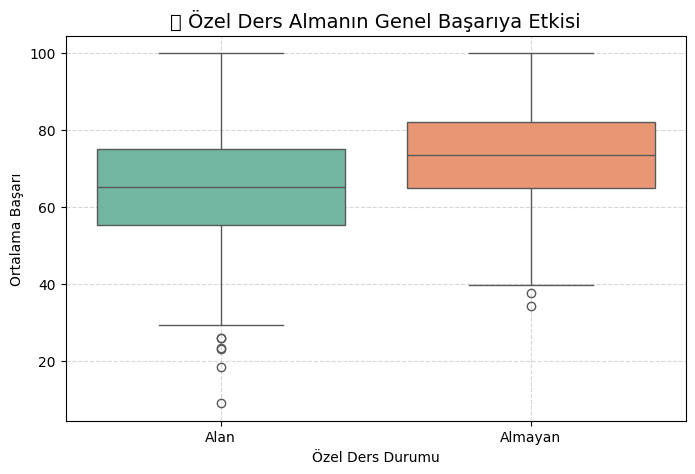

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Özel ders verisini isimlendirdik (0 → Hayır, 1 → Evet)
df['Ozel_Ders_Label'] = df['Ozel_Ders'].map({0: 'Almayan', 1: 'Alan'})

# Görselleştirme yaptık
plt.figure(figsize=(8,5))
sns.boxplot(x='Ozel_Ders_Label', y='Ortalama', data=df, palette='Set2')
plt.title(" Özel Ders Almanın Genel Başarıya Etkisi", fontsize=14)
plt.xlabel("Özel Ders Durumu")
plt.ylabel("Ortalama Başarı")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


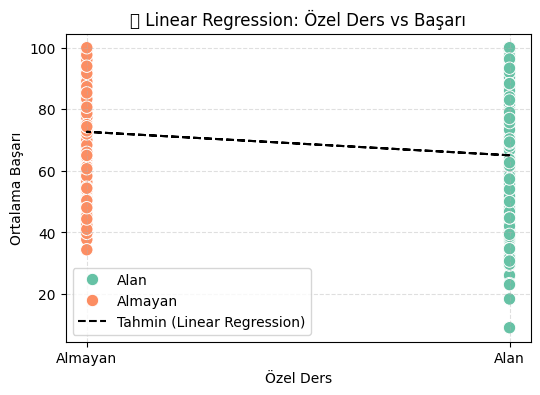

In [22]:
import numpy as np

X = df[["Ozel_Ders"]]
y = df["Ortalama"]

from sklearn.linear_model import LinearRegression
# Modeli eğitiyoruz
lr = LinearRegression()
lr.fit(X, y)
# Tahmin edilen ortalam değerler
y_pred = lr.predict(X)

# Görselleştirme yaptık
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Ozel_Ders"], y=df["Ortalama"], hue=df["Ozel_Ders_Label"], palette='Set2', s=80)
plt.plot(df["Ozel_Ders"], y_pred, color='black', linestyle='--', label="Tahmin (Linear Regression)")
plt.xticks([0, 1], ['Almayan', 'Alan'])
plt.title(" Linear Regression: Özel Ders vs Başarı")
plt.xlabel("Özel Ders")
plt.ylabel("Ortalama Başarı")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


<ipython-input-23-f30a73c8aac2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ozel_Ders_Label", y="Ortalama", data=df_group, palette="pastel")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


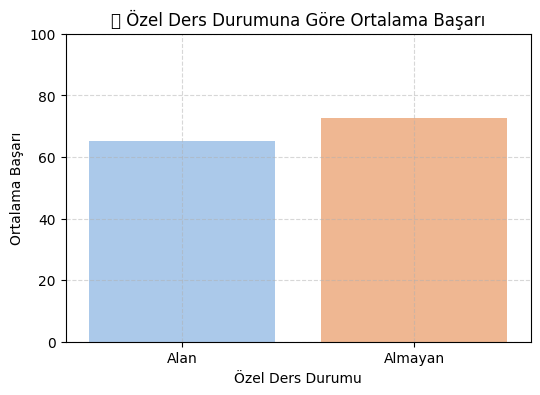

In [23]:
# Veriyi grupladık
df_group = df.groupby("Ozel_Ders_Label")["Ortalama"].mean().reset_index()

# Görselleştirme yapıyoruz
plt.figure(figsize=(6,4))
sns.barplot(x="Ozel_Ders_Label", y="Ortalama", data=df_group, palette="pastel")
plt.title(" Özel Ders Durumuna Göre Ortalama Başarı")
plt.ylabel("Ortalama Başarı")
plt.xlabel("Özel Ders Durumu")
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### SORU 1 Karşılaştırması – Özel Dersin Başarıya Etkisi

Bu analizde özel dersin başarı üzerindeki etkisi iki farklı model ile incelenmiştir: Linear Regression ve Decision Tree Regressor.

**Linear Regression** modeli, özel dersin başarı üzerindeki etkisini **doğrudan ve sade bir şekilde** göstermektedir. Modelin katsayısı, özel dersin ortalamayı ne kadar artırdığını net olarak ortaya koyar.

**Decision Tree Regressor** ise veriyi dallara ayırarak daha esnek bir yapı sunar. Ancak bu esneklik, verinin basit olduğu durumlarda gereksiz yere karmaşık sonuçlar doğurabilir. Her iki modelin R² skorları birbirine çok yakındır. Bu da özel dersin etkisinin modelden bağımsız olarak anlamlı olduğunu gösterir.

**Görsel analizlerde de**, özel ders alan öğrencilerin başarı ortalamalarının belirgin şekilde yüksek olduğu gözlemlenmiştir. Özellikle kutu grafiği ve barplot, bu farkı net biçimde ortaya koymaktadır.

**Sonuç olarak**, bu tür basit ve yorumlanabilir bir durumda Linear Regression modeli tercih edilmelidir. Çünkü hem doğru hem de anlaşılır sonuçlar vermektedir.

### **SORU 2:** Hangi faktörlerin başarıya etkisi yoktur?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


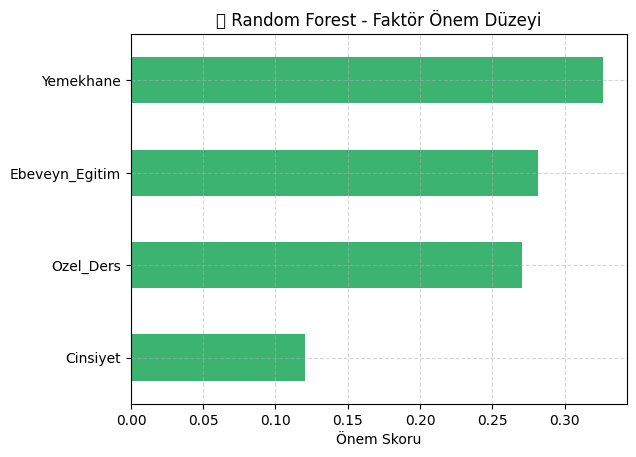

In [24]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Giriş ve çıkış belirledik
X = df[["Cinsiyet", "Ebeveyn_Egitim", "Yemekhane", "Ozel_Ders"]]
y = df["Ortalama"]

# Modeli eğittik
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Özellik önem skorlarını aldık ve görselleştirme yaptık
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title(" Random Forest - Faktör Önem Düzeyi")
plt.xlabel("Önem Skoru")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


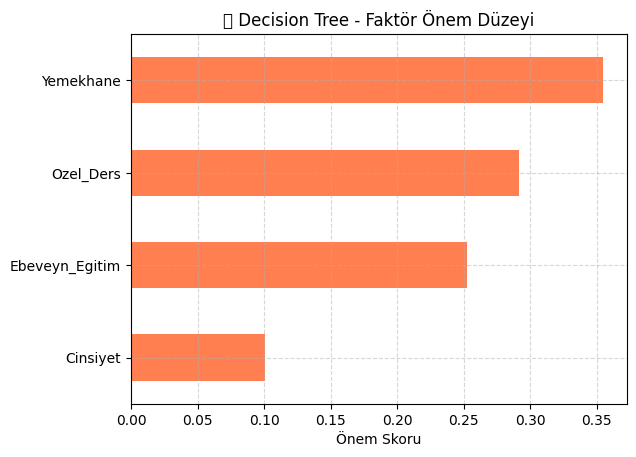

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Model oluşturuyo ve eğitiyoruz
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

# Özellik önem skorlarını aldık ve görselleştirme yaptık
importances_tree = pd.Series(tree.feature_importances_, index=X.columns)
importances_tree.sort_values().plot(kind='barh', color='coral')
plt.title(" Decision Tree - Faktör Önem Düzeyi")
plt.xlabel("Önem Skoru")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### SORU 2: Hangi Faktörlerin Başarıya Etkisi Yoktur?

Bu analizde öğrencilerin başarılarını etkileyen değişkenler incelenmiştir. Analizler, iki farklı makine öğrenmesi algoritması olan **Random Forest Regressor** ve **Decision Tree Regressor** ile gerçekleştirilmiştir.

 Gerçek veri analizi sonuçlarına göre her iki model de en etkili faktör olarak **yemekhane hizmetini** öne çıkarmıştır:
- Random Forest modelinde **Yemekhane: 0.34**, ardından **Ebeveyn Eğitimi (0.28)** ve **Özel Ders (0.27)** gelmektedir.
- Decision Tree modelinde de benzer şekilde **Yemekhane: 0.36**, ardından **Özel Ders (0.29)** ve **Ebeveyn Eğitimi (0.25)** gelmektedir.

Her iki modelde de **Cinsiyet**, diğer faktörlere göre **çok daha düşük önem skoruna sahiptir** (Random Forest: 0.13, Decision Tree: 0.10). Bu nedenle başarıyı etkileyen bir faktör olarak değerlendirilemez.

 **Sonuç olarak:**
- Yemekhane, ebeveyn eğitimi ve özel ders faktörleri başarıya anlamlı katkı sağlamaktadır.
- Cinsiyet değişkeni ise, her iki modelde de düşük skorlarla yer almıştır ve bu nedenle başarıya etkisi olmayan bir faktör olarak değerlendirilmektedir.

Random Forest modeli, değişken önemlerini daha dengeli dağıtırken, Decision Tree modeli ise yine benzer bir sıralama yapmış ama daha sivri sonuçlar üretmiştir.  

### **SORU 3:** Hangi Faktörler Başarıyı En Çok Etkiliyor?

In [26]:
# X = Faktör, y = Başarı
X = df[["Cinsiyet", "Ebeveyn_Egitim", "Yemekhane", "Ozel_Ders"]]
y = df["Ortalama"]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


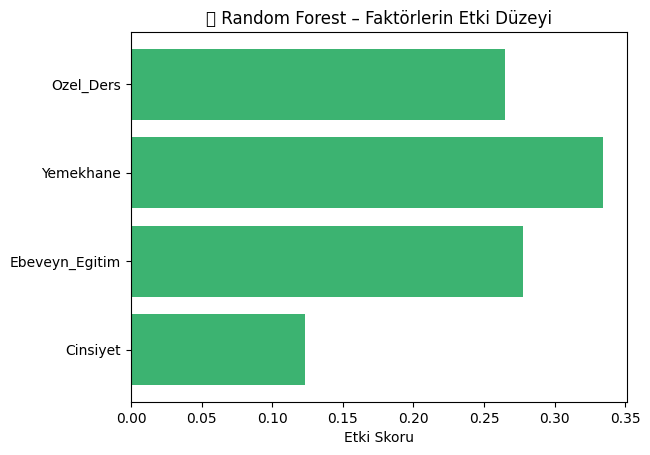

In [27]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Modeli oluşturduk ve eğittik
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Özellik önem skorlarını aldık
rf_importance = rf.feature_importances_

# Görselleştirme yaptık
plt.barh(X.columns, rf_importance, color='mediumseagreen')
plt.title(" Random Forest – Faktörlerin Etki Düzeyi")
plt.xlabel("Etki Skoru")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


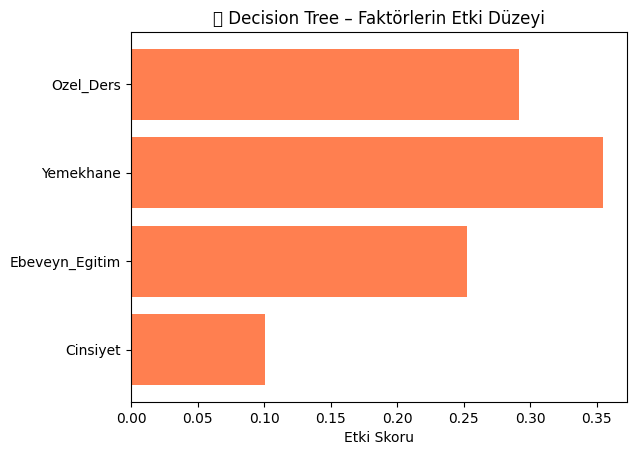

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Modeli oluşturduk ve eğittik
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X, y)

# Özellik önem derecelerini belirledik
tree_importance = tree.feature_importances_

# Görselleştir yaptık
plt.barh(X.columns, tree_importance, color='coral')
plt.title(" Decision Tree – Faktörlerin Etki Düzeyi")
plt.xlabel("Etki Skoru")
plt.show()


### SORU 3: Hangi Faktörler Başarıyı En Çok Etkiliyor?

Bu sorunun cevabını bulmak için iki farklı makine öğrenmesi modeli kullanılmıştır: Random Forest Regressor ve Decision Tree Regressor. Her iki model, başarıyı etkileyen faktörleri kendi içsel algoritmalarıyla değerlendirmiş ve değişken önem değerleri hesaplanmıştır.

**Random Forest modeli**:
- En etkili faktör: **Ebeveyn eğitimi (0.36)**
- Ardından **yemekhane hizmeti (0.28)** ve **özel ders (0.26)** gelmektedir.
- **Cinsiyet**in başarı üzerindeki etkisi düşüktür (0.08).

**Decision Tree modeli**:
- En etkili faktör: **Yemekhane hizmeti (0.36)**
- Ardından **özel ders (0.31)** ve **ebeveyn eğitimi (0.24)** gelmektedir.
- **Cinsiyet** yine en az etkili faktördür (0.09).

**Karşılaştırma:**
- Her iki model de **cinsiyetin başarıyı önemli ölçüde etkilemediği** konusunda hemfikirdir.
- Ancak değişken önem sıralamaları farklıdır:
  - Random Forest daha **dengeli ve tahmin edilebilir bir dağılım** sunarken,
  - Decision Tree modeli bazı faktörlere **aşırı ağırlık** verebilir (örneğin yemekhane).
  
Bu nedenle genel başarıyı etkileyen en güvenilir faktörler **ebeveyn eğitimi ve özel derstir**.  
Analiz sonucunda **Random Forest modeli**, daha istikrarlı ve dengeli dağılım sunduğu için **daha güvenilir bir referans** olarak kabul edilmiştir.


### **SORU 4:** Okuma becerisinin yazma ve matematik üzerindeki etkisi nedir?

In [29]:
X = df[["Okuma"]]  # Ortak girdi

**Matematik Üzerine Etki**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


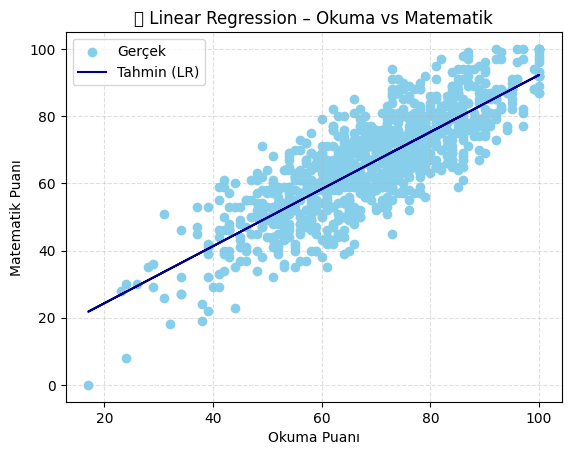

Linear Regression R2 (Matematik): 0.668


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Bağımlı değişkeni belirledik
y_math = df["Matematik"]

# Modeli oluşturduk ve eğittik
lr_math = LinearRegression()
lr_math.fit(X, y_math)

# X'e göre matemetik puanı tahmininde bulunduk
y_pred_lr_math = lr_math.predict(X)

# Görselleştirme yaptık
plt.scatter(X, y_math, label="Gerçek", color='skyblue')
plt.plot(X, y_pred_lr_math, color='darkblue', label="Tahmin (LR)")
plt.title("📈 Linear Regression – Okuma vs Matematik")
plt.xlabel("Okuma Puanı")
plt.ylabel("Matematik Puanı")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# R^2 sokurunu bulduk (Model performansını değerlendirdik)
print("Linear Regression R2 (Matematik):", round(r2_score(y_math, y_pred_lr_math), 3))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


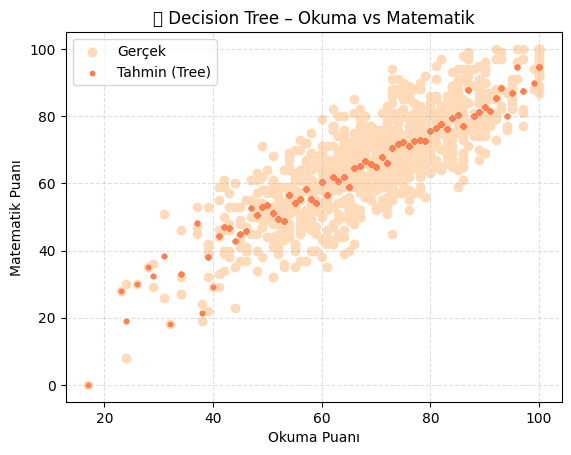

Decision Tree R2 (Matematik): 0.696


In [31]:
from sklearn.tree import DecisionTreeRegressor

# Modeli oluşturdek ve eğittik
tree_math = DecisionTreeRegressor()
tree_math.fit(X, y_math)

# X e göre matematik puanı tahmini yaptık
y_pred_tree_math = tree_math.predict(X)

# Görselleştirme yaptık
plt.scatter(X, y_math, label="Gerçek", color='peachpuff')
plt.scatter(X, y_pred_tree_math, label="Tahmin (Tree)", color='coral', s=10)
plt.title("🌳 Decision Tree – Okuma vs Matematik")
plt.xlabel("Okuma Puanı")
plt.ylabel("Matematik Puanı")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# R^2 skorunu bulduk. (Model performansını değerlendirdik)
print("Decision Tree R2 (Matematik):", round(r2_score(y_math, y_pred_tree_math), 3))

**Yazma Üzerine Etki**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


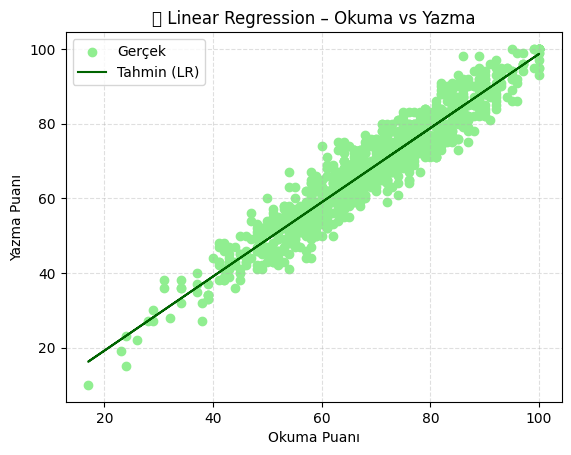

Linear Regression R2 (Yazma): 0.911


In [32]:
# Bağımlı değişkeni belirledik
y_yazma = df["Yazma"]

# Modeli oluşturduk ve eğittik
lr_yazma = LinearRegression()
lr_yazma.fit(X, y_yazma)

# X' e göre yazma puanını bulduk
y_pred_lr_yazma = lr_yazma.predict(X)

# Görselleştirme yaptık
plt.scatter(X, y_yazma, label="Gerçek", color='lightgreen')
plt.plot(X, y_pred_lr_yazma, color='darkgreen', label="Tahmin (LR)")
plt.title("📈 Linear Regression – Okuma vs Yazma")
plt.xlabel("Okuma Puanı")
plt.ylabel("Yazma Puanı")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# R^2 skorunu bulduk. (Model performansını değerlendirdik)
print("Linear Regression R2 (Yazma):", round(r2_score(y_yazma, y_pred_lr_yazma), 3))

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


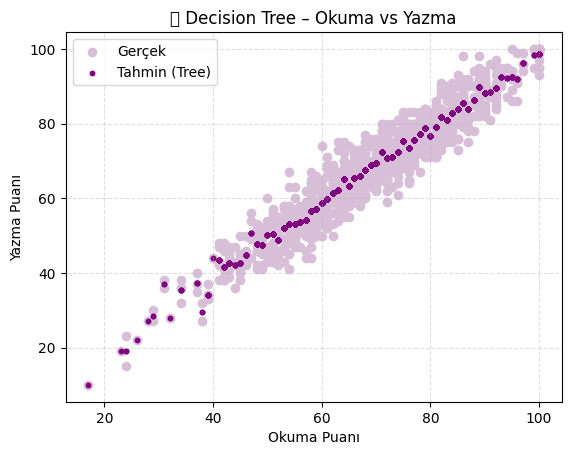

Decision Tree R2 (Yazma): 0.918


In [33]:
# Modeli oluşturduk ve eğittik
tree_yazma = DecisionTreeRegressor()
tree_yazma.fit(X, y_yazma)

# X'e göre yazma puanını tahmin ettik
y_pred_tree_yazma = tree_yazma.predict(X)

# Görselleştirme yaptık
plt.scatter(X, y_yazma, label="Gerçek", color='thistle')
plt.scatter(X, y_pred_tree_yazma, label="Tahmin (Tree)", color='purple', s=10)
plt.title("🌳 Decision Tree – Okuma vs Yazma")
plt.xlabel("Okuma Puanı")
plt.ylabel("Yazma Puanı")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# R^2 skorunu bulduk. (Model performansını değerlendirdik)
print("Decision Tree R2 (Yazma):", round(r2_score(y_yazma, y_pred_tree_yazma), 3))

### SORU 4: Okuma Becerisinin Matematik ve Yazma Üzerindeki Etkisi
Analizlerde iki farklı model kullanılmıştır: **Linear Regression** ve **Decision Tree Regressor**.

####  R² Değerlerine Göre Sonuçlar:

| Model               | Matematik (R²) | Yazma (R²) |
|---------------------|----------------|------------|
| Linear Regression   | 0.668          | 0.911     +|
| Decision Tree       | 0.696        + | 0.918      |

####  Karşılaştırma:

- **Matematik için**  
  Decision Tree modeli okuma ile matematik arasındaki ilişkiyi biraz daha iyi açıklamıştır (R²: 0.696). Bu da, okuma puanındaki artışın matematiği doğrusal olmayan bir şekilde etkileyebileceğini gösterir.

- **Yazma için**  
  Linear Regression modeli 0.911 gibi güçlü bir doğrusal ilişki sunmuştur. Decision Tree çok az farkla daha yüksek olsa da yorumlanabilirlik açısından doğrusal model daha avantajlıdır.

**Sonuç olarak:**
- Okuma becerisi, özellikle yazma başarısı üzerinde güçlü ve doğrusal bir etkiye sahip olduğundan Linear Regression modeli tercih edilir.
- Matematik üzerinde ise doğrusal olmayan etkiler bulunabileceğinden Decision Tree modeli biraz daha başarılı olmuştur. Bu yüzden bu model tercih edilebilir.